### 1.1 ขั้นตอนการทดลองในการนำเข้าข้อมูล แก้ปัญหาข้อผิดพลาดของข้อมูล และการปรับช่วงค่าของข้อมูล

#### import lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#### read data file

In [2]:
df = pd.read_csv('watch_test2_sample.csv')

#### แปลงชนิดของข้อมูล และทำการcopyข้อมูลไว้เพื่อใช้งานในการplot gps จากค่าจริง

In [3]:
df['uts'] = pd.to_datetime(df['uts'])
df.sort_values('uts', inplace = True)
df_copy = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6276 entries, 0 to 6275
Data columns (total 13 columns):
uts            6276 non-null datetime64[ns, pytz.FixedOffset(420)]
accelerateX    6266 non-null float64
accelerateY    6262 non-null float64
accelerateZ    6266 non-null float64
compass        6272 non-null float64
gps.x          6276 non-null float64
gps.y          6276 non-null float64
gyro.x         6262 non-null float64
gyro.y         6268 non-null float64
gyro.z         6268 non-null float64
heartrate      6269 non-null float64
light          6276 non-null int64
pressure       6268 non-null float64
dtypes: datetime64[ns, pytz.FixedOffset(420)](1), float64(11), int64(1)
memory usage: 686.4 KB


#### Data Cleaning
    1.1)จัดการข้อมูลซ้ำซ้อน

In [5]:
df = df.drop_duplicates(keep="first")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 6273
Data columns (total 13 columns):
uts            271 non-null datetime64[ns, pytz.FixedOffset(420)]
accelerateX    267 non-null float64
accelerateY    267 non-null float64
accelerateZ    267 non-null float64
compass        270 non-null float64
gps.x          271 non-null float64
gps.y          271 non-null float64
gyro.x         268 non-null float64
gyro.y         269 non-null float64
gyro.z         269 non-null float64
heartrate      270 non-null float64
light          271 non-null int64
pressure       269 non-null float64
dtypes: datetime64[ns, pytz.FixedOffset(420)](1), float64(11), int64(1)
memory usage: 29.6 KB


#### Data Cleaning 
    1.2)จัดการข้อมูลหายโดยการแทนที่ค่าmedianของแต่ละ column ลงไป

In [6]:
df = df.fillna(df.median())
df

,uts,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
0,2018-11-18 08:18:41+07:00,-3.957379,-14.204506,2.303692,355.85300,13.621563,100.369093,-1.304740,-2.642471,3.315061,117.0,12,1013.20100
7,2018-11-18 08:19:03+07:00,-0.038236,-1.156625,1.883101,355.85300,13.621482,100.369133,1.873036,2.521149,-1.295162,81.0,12,1013.16500
19,2018-11-18 08:19:45+07:00,1.906998,-4.361242,-4.358852,351.80853,13.621563,100.369088,-0.676847,-3.687540,1.123822,104.0,10,1013.21800
20,2018-11-18 08:20:13+07:00,-0.265259,-10.149148,3.042116,354.06730,13.621562,100.369103,-0.437397,1.558026,0.047890,122.0,10,1013.20795
30,2018-11-18 08:20:33+07:00,-2.098175,-11.195846,1.754056,354.06730,13.621545,100.369100,-2.849995,-1.562282,3.178840,78.5,11,1013.20600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6207,2018-11-18 16:07:32+07:00,4.803340,0.050184,-8.263658,225.21982,13.551022,100.280217,-0.031927,-0.094716,0.037248,66.0,0,1008.64700
6222,2018-11-18 16:07:58+07:00,1.780343,-6.609970,2.081448,228.24623,13.552975,100.280140,-1.199382,0.211781,-0.054275,70.0,99,1008.63794
6240,2018-11-18 16:08:19+07:00,0.399084,-8.364026,-5.357756,230.59320,13.553595,100.279633,-0.019156,-0.062789,0.100037,66.0,114,1008.72500
6263,2018-11-18 16:08:42+07:00,0.745593,-8.820463,-5.106835,232.32242,13.553518,100.279728,0.013835,0.034055,0.017028,57.0,44,1008.69300


#### Data Cleaning
    2.1) ทำการแทรกข้อมูลที่หายไปด้วย mean ทุกๆ30s 

In [7]:
#df = df.set_index('uts').resample('60S').mean()
#df

#### Data Cleaning
    2.2)interpolate 

In [8]:
df = df.set_index('uts').interpolate()
df

,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
uts,,,,,,,,,,,,
2018-11-18 08:18:41+07:00,-3.957379,-14.204506,2.303692,355.85300,13.621563,100.369093,-1.304740,-2.642471,3.315061,117.0,12,1013.20100
2018-11-18 08:19:03+07:00,-0.038236,-1.156625,1.883101,355.85300,13.621482,100.369133,1.873036,2.521149,-1.295162,81.0,12,1013.16500
2018-11-18 08:19:45+07:00,1.906998,-4.361242,-4.358852,351.80853,13.621563,100.369088,-0.676847,-3.687540,1.123822,104.0,10,1013.21800
2018-11-18 08:20:13+07:00,-0.265259,-10.149148,3.042116,354.06730,13.621562,100.369103,-0.437397,1.558026,0.047890,122.0,10,1013.20795
2018-11-18 08:20:33+07:00,-2.098175,-11.195846,1.754056,354.06730,13.621545,100.369100,-2.849995,-1.562282,3.178840,78.5,11,1013.20600
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-18 16:07:32+07:00,4.803340,0.050184,-8.263658,225.21982,13.551022,100.280217,-0.031927,-0.094716,0.037248,66.0,0,1008.64700
2018-11-18 16:07:58+07:00,1.780343,-6.609970,2.081448,228.24623,13.552975,100.280140,-1.199382,0.211781,-0.054275,70.0,99,1008.63794
2018-11-18 16:08:19+07:00,0.399084,-8.364026,-5.357756,230.59320,13.553595,100.279633,-0.019156,-0.062789,0.100037,66.0,114,1008.72500


#### Data Cleaning 
    3)ทำ moving average เพื่อลด noise 

In [9]:
#mva
df = df.rolling("3s").mean()
df = df.dropna()
df.head(20)

,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
uts,,,,,,,,,,,,
2018-11-18 08:18:41+07:00,-3.957379,-14.204506,2.303692,355.85300,13.621563,100.369093,-1.304740,-2.642471,3.315061,117.0,12.0,1013.20100
2018-11-18 08:19:03+07:00,-0.038236,-1.156625,1.883101,355.85300,13.621482,100.369133,1.873036,2.521149,-1.295162,81.0,12.0,1013.16500
2018-11-18 08:19:45+07:00,1.906998,-4.361242,-4.358852,351.80853,13.621563,100.369088,-0.676847,-3.687540,1.123822,104.0,10.0,1013.21800
2018-11-18 08:20:13+07:00,-0.265259,-10.149148,3.042116,354.06730,13.621562,100.369103,-0.437397,1.558026,0.047890,122.0,10.0,1013.20795
2018-11-18 08:20:33+07:00,-2.098175,-11.195846,1.754056,354.06730,13.621545,100.369100,-2.849995,-1.562282,3.178840,78.5,11.0,1013.20600
2018-11-18 08:20:53+07:00,-8.591049,-13.676377,7.972112,354.75748,13.621505,100.369027,-0.780077,0.595966,-0.592773,123.0,9.0,1013.21400
2018-11-18 08:21:18+07:00,4.007563,0.776660,-0.186398,354.75750,13.621548,100.369107,1.741072,-0.721545,1.188739,73.0,9.0,1013.20900
2018-11-18 08:21:39+07:00,-19.497740,-6.368608,2.848548,354.91470,13.621553,100.369073,-0.197946,-2.989408,-3.459796,58.0,10.0,1013.21700
2018-11-18 08:21:58+07:00,-10.720291,-2.399281,0.602210,354.68427,13.621523,100.369120,0.866279,-1.199382,-1.394135,0.0,11.0,1013.22000


#### Data Normalization
    ทำการ standardized Norm

In [10]:
#scaler
means = df.mean()
stds = df.std()

In [11]:
df = (df - means) / stds
df.head(20)

,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
uts,,,,,,,,,,,,
2018-11-18 08:18:41+07:00,-1.118282,-2.036701,-0.353763,2.096929,1.876887,1.872687,-1.750671,-3.573744,4.089767,0.513937,-1.065275,0.077559
2018-11-18 08:19:03+07:00,-0.342711,0.672244,-0.448671,2.096929,1.876873,1.872688,2.391790,3.445797,-1.622874,-0.048798,-1.065275,0.076974
2018-11-18 08:19:45+07:00,0.042237,0.006915,-1.857185,2.061940,1.876887,1.872687,-0.932167,-4.994435,1.374548,0.310727,-1.075608,0.077836
2018-11-18 08:20:13+07:00,-0.387637,-1.194745,-0.187136,2.081481,1.876887,1.872688,-0.620026,2.136505,0.041335,0.592095,-1.075608,0.077672
2018-11-18 08:20:33+07:00,-0.750358,-1.412056,-0.477790,2.081481,1.876884,1.872688,-3.765023,-2.105312,3.920973,-0.087877,-1.070442,0.077641
2018-11-18 08:20:53+07:00,-2.035252,-1.927053,0.925332,2.087452,1.876877,1.872686,-1.066735,0.828660,-0.752527,0.607727,-1.080775,0.077771
2018-11-18 08:21:18+07:00,0.457924,1.073624,-0.915659,2.087452,1.876885,1.872688,2.219766,-0.962394,1.454989,-0.173850,-1.080775,0.077689
2018-11-18 08:21:39+07:00,-4.193609,-0.409846,-0.230815,2.088812,1.876886,1.872687,-0.307885,-4.045379,-4.305126,-0.408324,-1.075608,0.077819
2018-11-18 08:21:58+07:00,-2.456614,0.414249,-0.737707,2.086818,1.876880,1.872688,1.079410,-1.611976,-1.745514,-1.314953,-1.070442,0.077868


### 1.2 ขั้นตอนการแสดงข้อมูลเชิงกราฟ 

#### แสดงกราฟข้อมูลแต่ละ feature (Column) ด้วย Line Plot เพื่อดูค่าที่แท้จริง 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000264C64E2C88>,
      dtype=object)

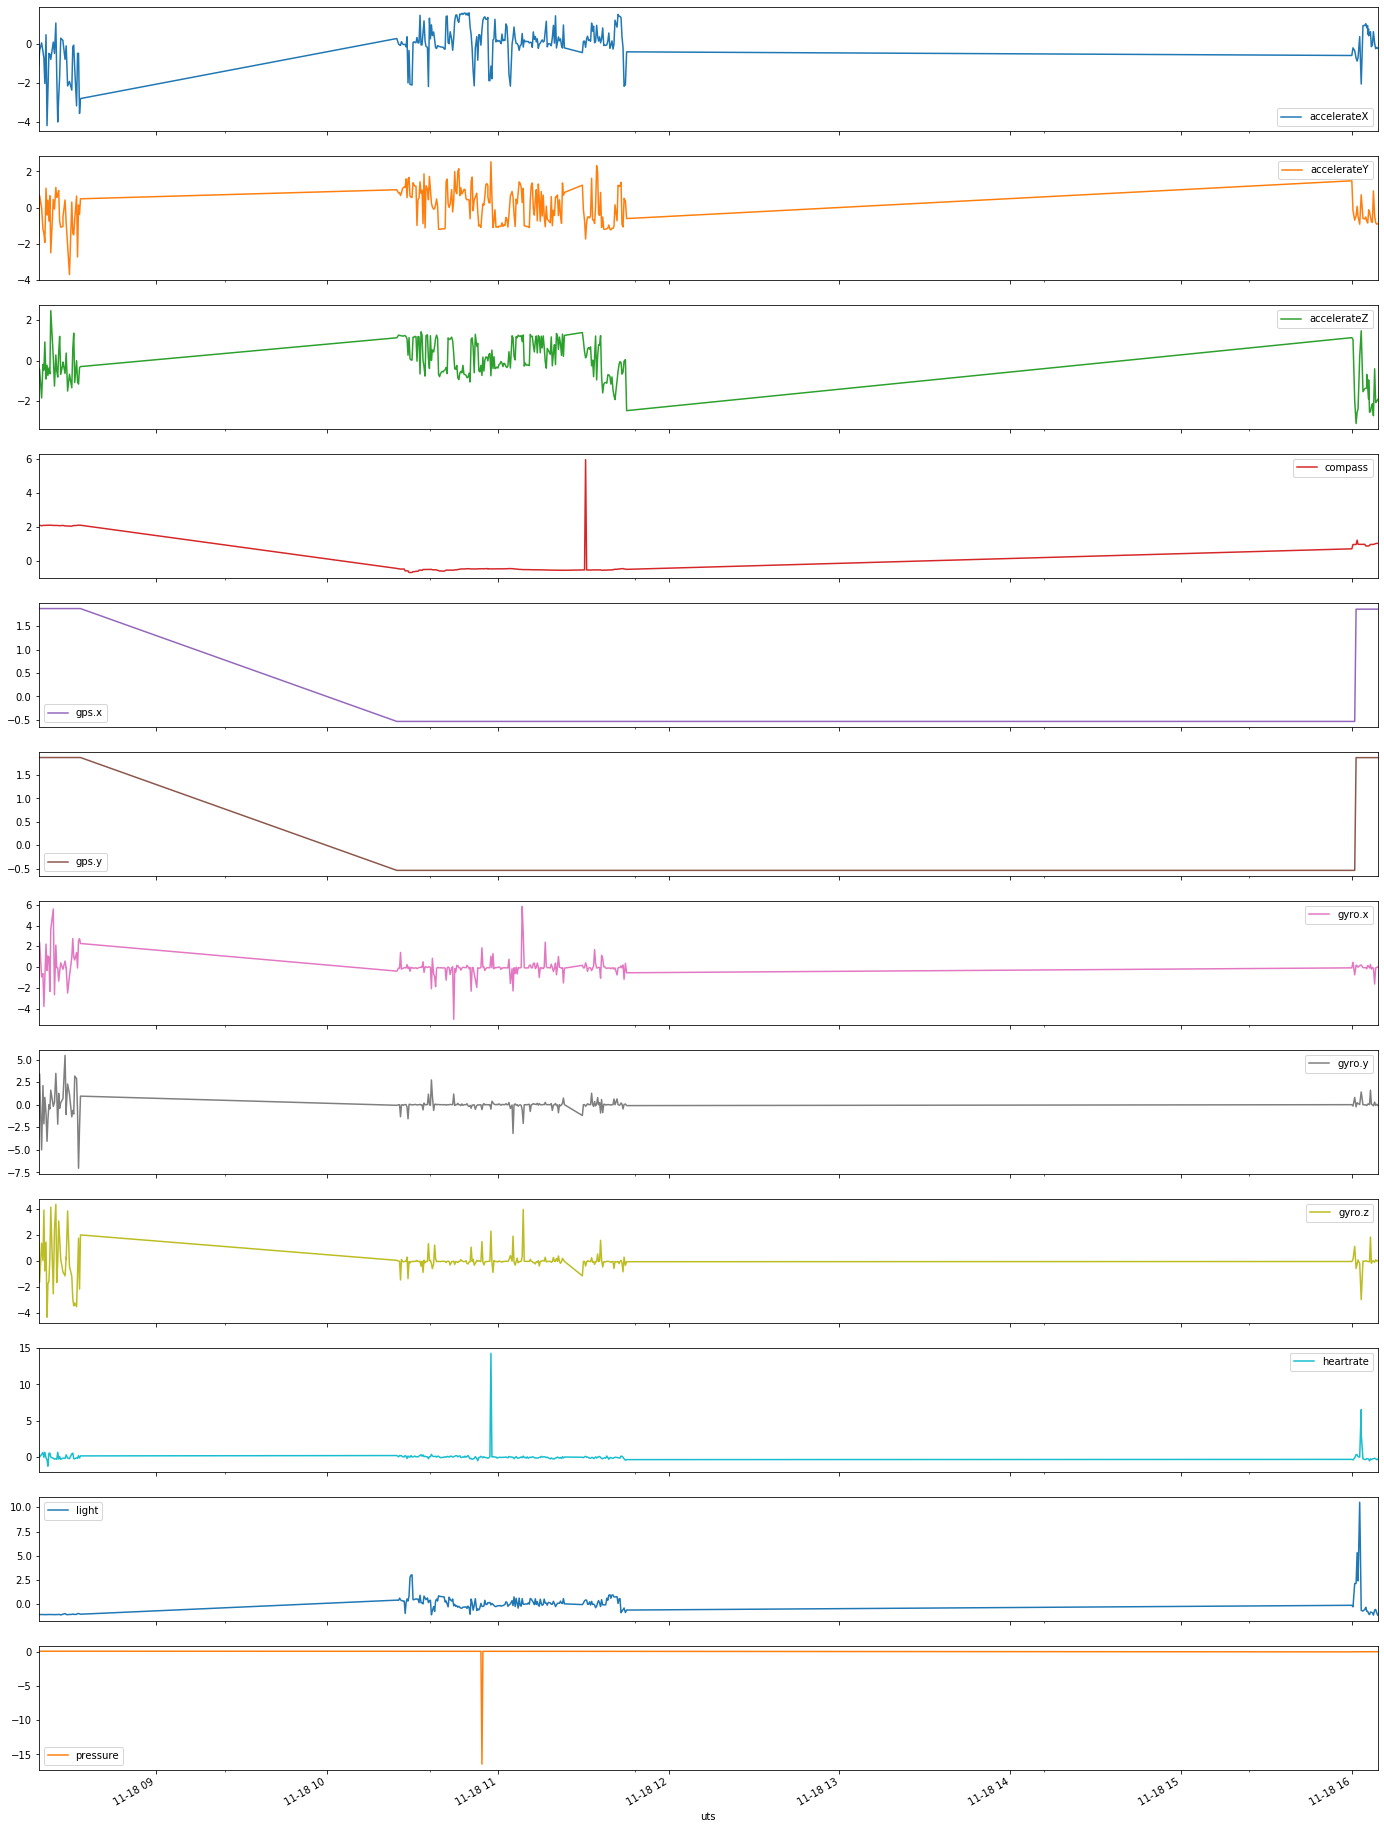

In [12]:
df.reset_index().plot(x='uts', subplots=True, figsize=(24, 36))

#### แสดงกราฟข้อมูลความสัมพันธ์ระหว่างคู่ features ด้วย 2D Scatter Pair Plot หรือ 2D sns.jointplot หรือ 3D Scatter Plot เพื่อดูความสัมพันธ์ของข้อมูลเชิง 3 มิติ (accelerateX, accelerateY, accelerateZ) หรือ (gyro.x, gyro.y, gyro.z)

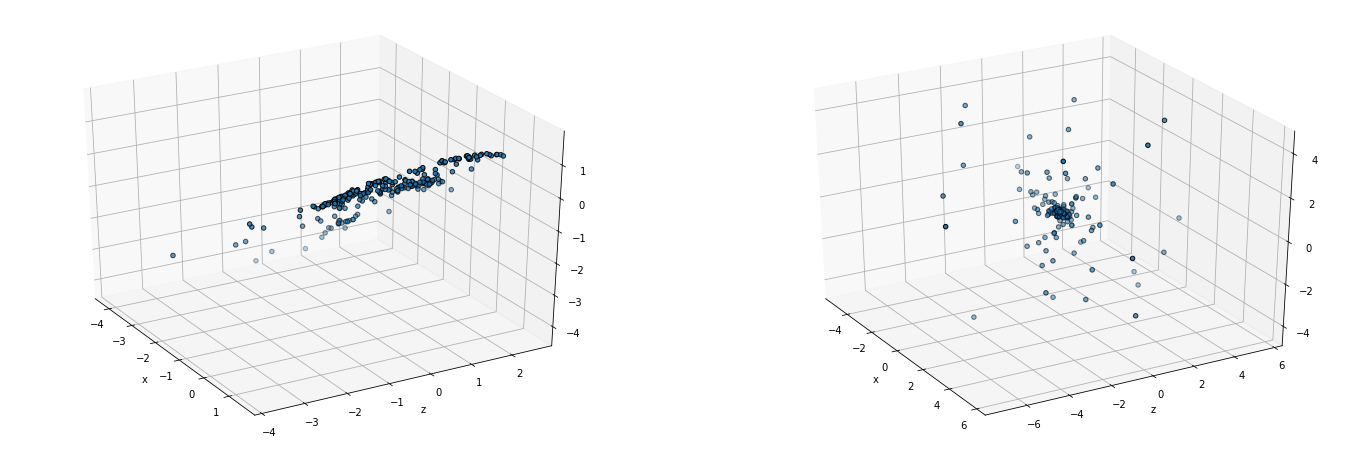

In [13]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(df['accelerateX'],df['accelerateY'],df['accelerateX'],s=20,edgecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylabel('z')
ax.view_init(30, -30)

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(df['gyro.x'],df['gyro.y'],df['gyro.z'],s=20,edgecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylabel('z')
ax.view_init(30, -30)

#### แสดงข้อมูลเชิงพิกัด Geolocation ของ ข้อมูล (gps.x, gps.y) 

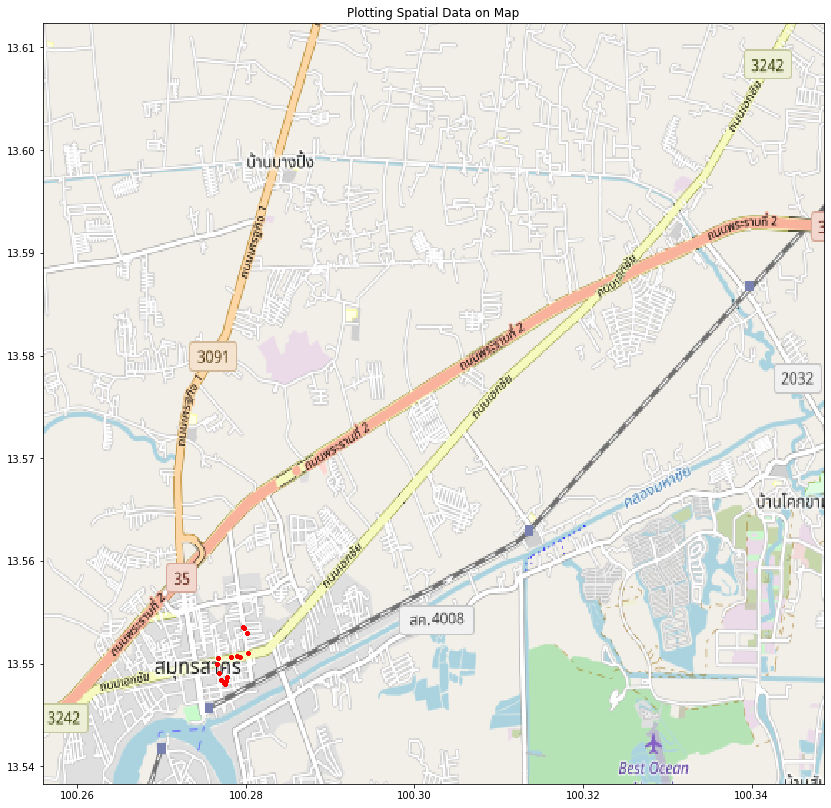

In [14]:
map_im = plt.imread('map.png')
fig, ax = plt.subplots(figsize=(14,14))
BBox = [100.2559,100.3486,13.5383,13.6124]
ax.scatter(df_copy['gps.y'], df_copy['gps.x'], zorder=1, alpha=0.5, c='r', s=10)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_im, zorder=0, extent=BBox, aspect='auto')

### 1.3 ขั้นตอนการจัดเตรียมข้อมูลเพื่อนำเข้าโมเดล 

#### ทำการจัดข้อมูล 5 Features [accelerateX, accelerateY, accelerateZ, compass, heartrate] ในรูปของอะเรย์ 2 มิติ 2 ชุด 

#### อะเรย์ชุดที่ 1: เป็นการจัดเรียงข้อมูล โดยต้องการ row: single time sample / column: 5 features เพื่อให้ได้ผลลัพธ์เป็นอะเรย์ขนาด  (shape: ( #sample, #features )) 

In [15]:
df.head(50)

,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
uts,,,,,,,,,,,,
2018-11-18 08:18:41+07:00,-1.118282,-2.036701,-0.353763,2.096929,1.876887,1.872687,-1.750671,-3.573744,4.089767,0.513937,-1.065275,0.077559
2018-11-18 08:19:03+07:00,-0.342711,0.672244,-0.448671,2.096929,1.876873,1.872688,2.391790,3.445797,-1.622874,-0.048798,-1.065275,0.076974
2018-11-18 08:19:45+07:00,0.042237,0.006915,-1.857185,2.061940,1.876887,1.872687,-0.932167,-4.994435,1.374548,0.310727,-1.075608,0.077836
2018-11-18 08:20:13+07:00,-0.387637,-1.194745,-0.187136,2.081481,1.876887,1.872688,-0.620026,2.136505,0.041335,0.592095,-1.075608,0.077672
2018-11-18 08:20:33+07:00,-0.750358,-1.412056,-0.477790,2.081481,1.876884,1.872688,-3.765023,-2.105312,3.920973,-0.087877,-1.070442,0.077641
2018-11-18 08:20:53+07:00,-2.035252,-1.927053,0.925332,2.087452,1.876877,1.872686,-1.066735,0.828660,-0.752527,0.607727,-1.080775,0.077771
2018-11-18 08:21:18+07:00,0.457924,1.073624,-0.915659,2.087452,1.876885,1.872688,2.219766,-0.962394,1.454989,-0.173850,-1.080775,0.077689
2018-11-18 08:21:39+07:00,-4.193609,-0.409846,-0.230815,2.088812,1.876886,1.872687,-0.307885,-4.045379,-4.305126,-0.408324,-1.075608,0.077819
2018-11-18 08:21:58+07:00,-2.456614,0.414249,-0.737707,2.086818,1.876880,1.872688,1.079410,-1.611976,-1.745514,-1.314953,-1.070442,0.077868


In [16]:
columns = ['accelerateX', 'accelerateY', 'accelerateZ', 'compass', 'heartrate']
arr = df[columns].to_numpy()
arr.shape

(271, 5)

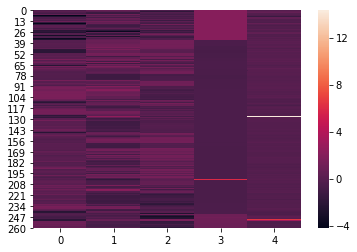

In [17]:
sns.heatmap(arr)

 #### อะเรย์ชุดที่ 2: เป็นการจัดเรียงข้อมูล time series ในรูปของ อะเรย์ 3 มิติ โดยต้องการตัด ข้อมูลตาม time series เงื่อนไข time_step และ time stride ที่นศ.กำหนด เพื่อให้ได้ ผลลัพธ์เป็นอะเรย์ขนาด  (shape: ( #ชุด time_series, #time_step, #features ))  จากนั้นปรับอะเรย์ 3 มิติที่ได้ ให้อยู่ในรูปของ 2 มิติขนาด  (shape: ( #ชุด*#time_step, #features )) 

In [18]:
timestep = 3
stride = 1
data = []
for i in range(0, len(df)-timestep+1, stride):
    data.append(df[columns].iloc[i: i+timestep].to_numpy())

In [19]:
data = np.array(data)
data.shape

(269, 3, 5)

In [20]:
data

array([[[-1.11828156, -2.03670093, -0.35376317,  2.09692929,
          0.51393742],
        [-0.34271073,  0.67224354, -0.4486707 ,  2.09692929,
         -0.0487981 ],
        [ 0.04223724,  0.00691484, -1.85718468,  2.06193985,
          0.31072737]],

       [[-0.34271073,  0.67224354, -0.4486707 ,  2.09692929,
         -0.0487981 ],
        [ 0.04223724,  0.00691484, -1.85718468,  2.06193985,
          0.31072737],
        [-0.3876371 , -1.19474507, -0.18713573,  2.08148088,
          0.59209513]],

       [[ 0.04223724,  0.00691484, -1.85718468,  2.06193985,
          0.31072737],
        [-0.3876371 , -1.19474507, -0.18713573,  2.08148088,
          0.59209513],
        [-0.75035831, -1.41205597, -0.47779004,  2.08148088,
         -0.08787695]],

       ...,

       [[ 0.61540298,  0.92279609, -2.73831488,  0.96679796,
         -0.28327123],
        [ 0.01717307, -0.45995626, -0.40391315,  0.99297999,
         -0.22074506],
        [-0.25616838, -0.82412577, -2.08259004,  1.013284

In [21]:
data = np.concatenate(data)

In [22]:
data

array([[-1.11828156, -2.03670093, -0.35376317,  2.09692929,  0.51393742],
       [-0.34271073,  0.67224354, -0.4486707 ,  2.09692929, -0.0487981 ],
       [ 0.04223724,  0.00691484, -1.85718468,  2.06193985,  0.31072737],
       ...,
       [-0.25616838, -0.82412577, -2.08259004,  1.01328405, -0.28327123],
       [-0.18759656, -0.91888925, -2.02596911,  1.02824384, -0.42395511],
       [-0.24008947, -0.89408187, -1.92728678,  1.02824384, -0.33016586]])

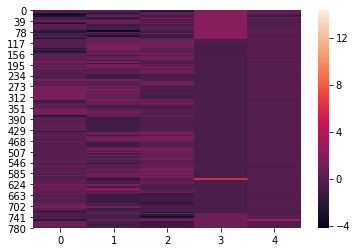

In [23]:
sns.heatmap(data)